In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
def batch_data(x, y, size):
    perm = np.arange(len(x))
    np.random.shuffle(perm)
    x = x[perm]
    y = y[perm]
    return x[:size],y[:size]

In [4]:
df = pd.read_csv('data/train.csv')
images = df[df.columns[1:]]
given_label = df['label']

images = images.values
images = np.multiply(images, 1.0 / 255.0)
labels = pd.get_dummies(given_label).values

FileNotFoundError: [Errno 2] File data/train.csv does not exist: 'data/train.csv'

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images,
                                                    labels,
                                                    test_size = .25,random_state=4444)

# Convolutional NN

### Weights, Biases, Convolution, Pooling for the Rectified Linear Units(Neuron)


In [5]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial, name='weights')

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial, name='biases')

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME', name='convolution')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME', name='pool')

In [6]:
sess = tf.InteractiveSession()

In [9]:
with tf.Graph().as_default():
    x = tf.placeholder(tf.float32, [None, 784])
    W = tf.Variable(tf.zeros([784, 10]))
    b = tf.Variable(tf.zeros([10]))
    y_ = tf.placeholder(tf.float32, [None, 10])
    
#Inference
    with tf.name_scope('hidden1'):
        W_conv1 = weight_variable([5, 5, 1, 32])
        b_conv1 = bias_variable([32])
        x_image = tf.reshape(x, [-1,28,28,1])
        hidden1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

    with tf.name_scope('hidden2'):
        h_pool1 = max_pool_2x2(hidden1)
        W_conv2 = weight_variable([5, 5, 32, 64])
        b_conv2 = bias_variable([64])
        h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

    with tf.name_scope('fully_connected1'):
        h_pool2 = max_pool_2x2(h_conv2)
        W_fc1 = weight_variable([7 * 7 * 64, 1024])
        b_fc1 = bias_variable([1024])
        h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
        fully_connected1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    with tf.name_scope('dropout'):
        keep_prob = tf.placeholder(tf.float32)
        dropout = tf.nn.dropout(fully_connected, keep_prob)

    with tf.name_scope('softmax'):
        W_fc2 = weight_variable([1024, 10])
        b_fc2 = bias_variable([10])
        y_conv=tf.nn.softmax(tf.matmul(dropout, W_fc2) + b_fc2)

#Loss
    cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv), name='xentropy')
    
#Training
    tf.scalar_summary(cross_entropy.op.name, cross_entropy)
    global_step=tf.Variable(0,name='global_step',trainable=False)
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy,global_step=global_step)
    
#Evaluation
    correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#Log Creation
    summary_op = tf.merge_all_summaries()
    sess = tf.Session()
    init = tf.initialize_all_variables()
    saver = tf.train.Saver()

    sess.run(init)

    summary_writer = tf.train.SummaryWriter('tensor_flow_logs',graph_def=sess.graph_def)
#TrainingLoop
    for i in range(20000):
        x_batch, y_batch = batch_data(X_train,y_train,50)
        feed_dict = {x: x_batch, y_: y_batch, keep_prob:1.0}
        sess.run([train_step,cross_entropy,accuracy],feed_dict=feed_dict)
        if i%100 == 0:
            acc = sess.run(accuracy, feed_dict={x:x_batch, y_: y_batch, keep_prob: 1.0})
            summary_str = sess.run(summary_op, feed_dict=feed_dict)
            summary_writer.add_summary(summary_str, i)
            print("step %d, training accuracy %g"%(i, acc))
        if i%1000 == 0:
            save_path = saver.save(sess,"data/model_newest.ckpt")
            print("Model saved in file: %s" % save_path)

step 0, training accuracy 0.36
Model saved in file: data/model_newest.ckpt
step 100, training accuracy 0.8
step 200, training accuracy 0.94
step 300, training accuracy 0.92
step 400, training accuracy 0.98
step 500, training accuracy 0.98
step 600, training accuracy 0.92
step 700, training accuracy 1
step 800, training accuracy 0.94
step 900, training accuracy 0.94
step 1000, training accuracy 0.98
Model saved in file: data/model_newest.ckpt
step 1100, training accuracy 0.96
step 1200, training accuracy 1
step 1300, training accuracy 0.96
step 1400, training accuracy 1
step 1500, training accuracy 0.96
step 1600, training accuracy 1
step 1700, training accuracy 0.92
step 1800, training accuracy 1
step 1900, training accuracy 0.98
step 2000, training accuracy 0.96
Model saved in file: data/model_newest.ckpt
step 2100, training accuracy 1
step 2200, training accuracy 0.98
step 2300, training accuracy 0.98
step 2400, training accuracy 0.98
step 2500, training accuracy 0.98
step 2600, trai

In [ ]:
sess = tf.InteractiveSession()

In [21]:
with tf.Graph().as_default():
    x = tf.placeholder(tf.float32, [None, 784])
    W = tf.Variable(tf.zeros([784, 10]))
    b = tf.Variable(tf.zeros([10]))
    y_ = tf.placeholder(tf.float32, [None, 10])
    
#Inference
    with tf.name_scope('hidden1'):
        W_conv1 = weight_variable([5, 5, 1, 32])
        b_conv1 = bias_variable([32])
        x_image = tf.reshape(x, [-1,28,28,1])
        hidden1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

    with tf.name_scope('hidden2'):
        h_pool1 = max_pool_2x2(hidden1)
        W_conv2 = weight_variable([5, 5, 32, 64])
        b_conv2 = bias_variable([64])
        h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

    with tf.name_scope('fully_connected'):
        h_pool2 = max_pool_2x2(h_conv2)
        W_fc1 = weight_variable([7 * 7 * 64, 1024])
        b_fc1 = bias_variable([1024])
        h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
        fully_connected = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    with tf.name_scope('dropout'):
        keep_prob = tf.placeholder(tf.float32)
        dropout = tf.nn.dropout(fully_connected, keep_prob)

    with tf.name_scope('softmax'):
        W_fc2 = weight_variable([1024, 10])
        b_fc2 = bias_variable([10])
        y_conv=tf.nn.softmax(tf.matmul(dropout, W_fc2) + b_fc2)

#Loss
    cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv), name='xentropy')
    
#Training
    tf.scalar_summary(cross_entropy.op.name, cross_entropy)
    global_step=tf.Variable(0,name='global_step',trainable=False)
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy,global_step=global_step)
    
#Evaluation
    correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#Log Creation
    summary_op = tf.merge_all_summaries()
    sess = tf.Session()
    init = tf.initialize_all_variables()
    saver = tf.train.Saver()

#Restore
    saver.restore(sess,"data/model.ckpt")
    ac = sess.run(accuracy, feed_dict={x: X_test, y_: y_test, keep_prob: 1.0})

In [22]:
ac

0.98923808

In [23]:
print("test accuracy {}".format(ac))

test accuracy 0.989238083363


# Visualizing Residuals

In [64]:
y_fit = sess.run(tf.argmax(y_conv,1),feed_dict={x: test, keep_prob:1})

In [65]:
y_fit

array([7])

In [27]:
def undummy(arr):
    num = []
    for i in arr:
        for j in range(len(i)):
            if i[j]==1.0:
                num.append(j)
    return num                 

In [28]:
ys = np.array(undummy(y_test))

In [29]:
def show_img(i):
    boximages = np.array(X_test).reshape(len(X_test),28,28)
    print 'Actual:', list(y_test)[i]
    print 'Predicted:', list(y_fit)[i]
    plt.matshow(boximages[i],cmap=plt.cm.Greys)

In [30]:
residual_index = [i for i, (val,valb) in enumerate(zip(ys,y_fit)) if val!=valb]

In [31]:
residual_index

[50,
 73,
 152,
 234,
 322,
 328,
 355,
 457,
 487,
 601,
 792,
 1182,
 1193,
 1376,
 1403,
 1417,
 1482,
 1490,
 1513,
 1554,
 1719,
 1913,
 1917,
 2204,
 2455,
 2501,
 2584,
 2811,
 2812,
 2908,
 3031,
 3225,
 3433,
 3475,
 3651,
 3737,
 3748,
 4027,
 4202,
 4228,
 4237,
 4332,
 4351,
 4356,
 4368,
 4752,
 4776,
 4857,
 5050,
 5064,
 5107,
 5220,
 5231,
 5237,
 5282,
 5286,
 5347,
 5487,
 5724,
 5893,
 5913,
 6192,
 6200,
 6305,
 6717,
 6773,
 6811,
 6876,
 6884,
 7047,
 7107,
 7326,
 7342,
 7409,
 7568,
 7627,
 7629,
 7632,
 7693,
 7730,
 7885,
 7908,
 7943,
 8267,
 8340,
 8351,
 8509,
 8515,
 8523,
 8535,
 8546,
 8567,
 8692,
 9181,
 9264,
 9540,
 9838,
 9969,
 10058,
 10147,
 10371,
 10487]

Actual: [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Predicted: 9


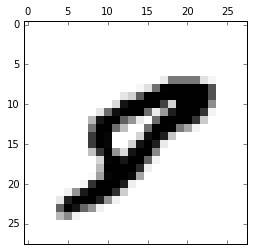

In [32]:
show_img(50)

In [33]:
residual = [val!=valb for i, (val,valb) in enumerate(zip(ys,y_fit))]
residual = np.array(residual)
X_images = np.array(X_test).reshape(len(X_test),28,28)
X_residual = X_images[residual]

In [34]:
def plot_averages(data,actual):
    fig = plt.figure(figsize = (10,6))
    for i in range(10):
        plt.subplot(2,5,i+1).matshow(np.mean(data[np.array(actual==i)], axis=0),cmap=plt.cm.Greys)
        plt.title('Number: {}'.format(i))
        plt.subplot(2,5,i+1).xaxis.set_ticks_position('bottom')

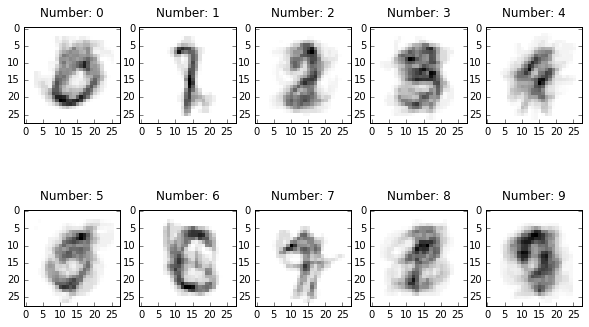

In [35]:
plot_averages(X_residual,ys[residual])

# Confusion

In [36]:
confusion = np.zeros([10,10])
for i,j in zip(ys,y_fit):
    confusion[i][j]+=1

In [37]:
percentage = confusion/np.sum(confusion, axis=1)

In [38]:
for i in range(10):
    percentage[i][i] = 0

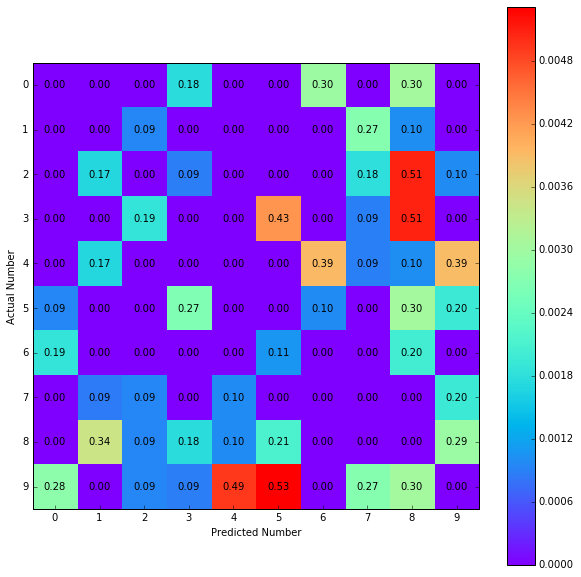

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
# plt.figure()
c = ax.matshow(percentage,cmap=plt.cm.rainbow)
fig.colorbar(c)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel('Predicted Number')
plt.ylabel('Actual Number')

for (i, j), z in np.ndenumerate(percentage):
    ax.text(j, i, '{:0.2f}'.format(z*100), ha='center', va='center')
    ax.xaxis.set_ticks_position('bottom')

In [40]:
from sklearn.metrics import classification_report

In [41]:
print classification_report(ys,y_fit,digits=5)

             precision    recall  f1-score   support

          0    0.99436   0.99249   0.99342      1065
          1    0.99231   0.99572   0.99401      1167
          2    0.99433   0.98966   0.99199      1064
          3    0.99201   0.98937   0.99069      1129
          4    0.99306   0.98815   0.99060      1013
          5    0.98727   0.98937   0.98832       941
          6    0.99215   0.99508   0.99361      1016
          7    0.99095   0.99545   0.99320      1100
          8    0.97688   0.98680   0.98182       985
          9    0.98813   0.97941   0.98375      1020

avg / total    0.99030   0.99029   0.99029     10500

